In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('after_prepros.csv')
del df['Unnamed: 0']
df = df[2:].reset_index(drop=True)
df = df[df['cor_name']!='현대오토에버']

In [3]:
del df['pre_demand_day']
del df['subs_day']
del df['cor_name']

df['sicho_p']=df['sicho_p'].astype('int64')

In [4]:
x = df[["cor_rate","obligation","market_type","listed_date","offer_price","profit_percent","sales","profit","shares_to_pub","sub_rate","l_exp_offer_price","h_exp_offer_price"]].values
y = df["sicho_p"].values

OLS 회귀분석

In [5]:
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import statsmodels.api as sm; 
x

array([[1.48078e+03, 6.08000e+00, 0.00000e+00, ..., 4.32580e+02,
        1.30000e+04, 1.50000e+04],
       [1.67090e+03, 3.77000e+01, 0.00000e+00, ..., 1.72496e+03,
        2.50000e+04, 3.00000e+04],
       [1.30370e+02, 1.89400e+01, 1.00000e+00, ..., 3.40000e+00,
        3.50000e+04, 4.31000e+04],
       ...,
       [6.50720e+02, 5.98600e+01, 0.00000e+00, ..., 8.99070e+02,
        9.60000e+03, 1.10000e+04],
       [5.78200e+02, 5.95000e+01, 0.00000e+00, ..., 6.75790e+02,
        6.00000e+03, 6.90000e+03],
       [4.44100e+02, 5.56000e+01, 0.00000e+00, ..., 5.89580e+02,
        6.60000e+03, 7.50000e+03]])

In [7]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              537.0
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                   7.63e-258
Time:                        12:27:39   Log-Likelihood:                         -5094.4
No. Observations:                 462   AIC:                                  1.021e+04
Df Residuals:                     450   BIC:                                  1.026e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7864      1.689      2.242      0.025       0.467       7.106
x2           218.1747     51.230      4.259      0.000     117.495     318.854
x3          3921.4867   2439.408      1.608      0.109    -872.560    8715.533
x4            -0.0005   7.63e-05     -6.836      0.000      -0.001      -0.000
x5             1.1016      0.137      8.048      0.000       0.833       1.371
x6           177.2261     23.708      7.475      0.000     130.633     223.819
x7             0.0059      0.001      4.926      0.000       0.004       0.008
x8            -0.0453      0.007     -6.140      0.000      -0.060      -0.031
x9           -76.6065    829.050     -0.092      0.926   -1705.896    1552.683
x10           -0.1706      0.190     -0.899      0.369      -0.543       0.202
x11            0.0250      0.349      0.072      0.943      -0.662       0.712
x12            0.0818      0.333      0.246      0.806      -0.572       0.735
==============================================================================
Omnibus:                      378.684   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64801.228
Skew:                           2.641   Prob(JB):                         0.00
Kurtosis:                      60.779   Cond. No.                     7.02e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다중공선성 확인

In [8]:
import statsmodels.api as sm

In [9]:
x = df[["cor_rate","obligation","market_type","listed_date","offer_price","profit_percent","sales","profit","shares_to_pub","sub_rate","l_exp_offer_price","h_exp_offer_price"]]
# x = pd.DataFrame(x)

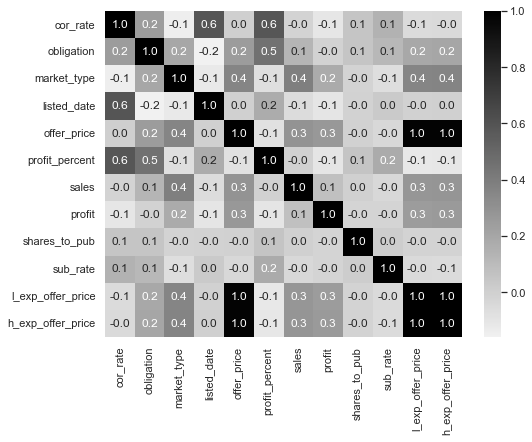

In [10]:
cmap = sns.light_palette("black", as_cmap=True)
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(x.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.109153,sub_rate
1,1.135075,profit
2,1.299469,sales
3,1.570234,market_type
4,2.073892,shares_to_pub
5,3.034761,obligation
6,4.047796,profit_percent
7,4.650716,cor_rate
8,4.820358,listed_date
9,70.287199,offer_price


In [12]:
x

,cor_rate,obligation,market_type,listed_date,offer_price,profit_percent,sales,profit,shares_to_pub,sub_rate,l_exp_offer_price,h_exp_offer_price
0,1480.78,6.08,0,20220809,15000,-2.00,35745,7479.0,1.00,432.58,13000,15000
1,1670.90,37.70,0,20220804,35000,100.00,33389,4423.0,0.84,1724.96,25000,30000
2,130.37,18.94,1,20220801,35000,-5.71,294111,53318.0,0.75,3.40,35000,43100
3,57.28,12.47,0,20220729,34000,-10.00,24167,2428.0,0.88,2.51,34000,44000
4,2269.68,38.66,0,20220728,50000,99.80,65939,-2998.0,1.00,1207.10,40700,47500
...,...,...,...,...,...,...,...,...,...,...,...,...
458,598.86,65.18,1,20140806,104000,73.08,508758,57440.0,1.00,175.10,80000,104000
459,441.99,10.37,0,20140808,9100,-10.00,51059,6446.0,1.00,99.30,8100,9100
460,650.72,59.86,0,20140801,13000,66.54,104434,11718.0,1.00,899.07,9600,11000
461,578.20,59.50,0,20140730,8300,100.00,69032,14887.0,1.00,675.79,6000,6900
